In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (10,8)

In [6]:
#Reading the data
df = pd.read_csv('foundations-of-datascience-datsets/physics/spring-mass.csv')
print(df)

   M (g)  T (s)
0     55  0.496
1    105  0.645
2    155  0.761
3    205  0.867
4    255  0.957
5    305  1.037


In [7]:
#Calculate the square of T
df['Tsq'] = df['T (s)'] ** 2
print(df)

   M (g)  T (s)       Tsq
0     55  0.496  0.246016
1    105  0.645  0.416025
2    155  0.761  0.579121
3    205  0.867  0.751689
4    255  0.957  0.915849
5    305  1.037  1.075369


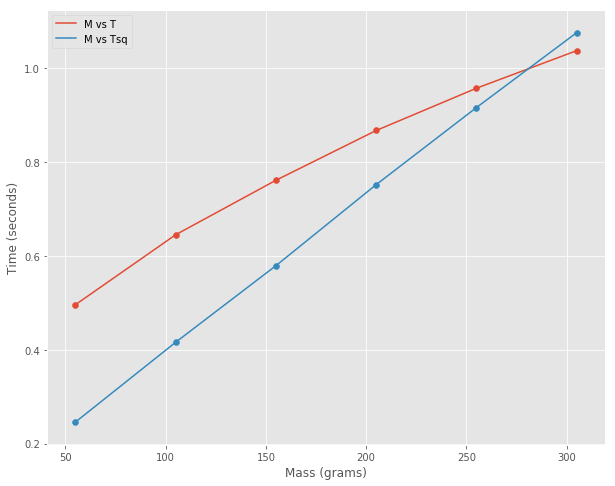

In [8]:
#Plot the data here to visualize the trend
#Plot M-vs-T as well as M-vs-Tsq for comparison
orig, = plt.plot(df['M (g)'], df['T (s)'], label="M vs T")
plt.scatter(df['M (g)'], df['T (s)'])
sq, = plt.plot(df['M (g)'], df['Tsq'],label="M vs Tsq")
plt.scatter(df['M (g)'], df['Tsq'])
plt.xlabel('Mass (grams)')
plt.ylabel('Time (seconds)')
plt.legend(handles=[orig, sq])
plt.show()

In [9]:
n = df['M (g)'].count()                #Number of samples
p = np.sum(np.square(df['M (g)']))     #The sum of x^2
q = df['M (g)'].sum()                  #The sum of x
r = np.sum(df['M (g)']*df['Tsq'])      #The sum of the product of x and y
s = df['Tsq'].sum()                    #The sum of y^2

#Print all of the above
print("The number of samples is:\t", n)
print("The sum of M^2 is:\t\t", p)
print("The sum of M is:\t\t", q)
print("The sum of M*Tsq is:\t\t", r)
print("The sum of Tsq is:\t\t",s)

The number of samples is:	 6
The sum of M^2 is:		 238150
The sum of M is:		 1080
The sum of M*Tsq is:		 862.602545
The sum of Tsq is:		 3.984069


In [10]:
m = (1/((n*p) - (q**2)))*((n*r) - (q*s))    #The slope of the line
c = (1/((n*p) - (q**2)))*((p*s) - (r*q))    #The y-intercept of the line

print("The slope of the estimated line is:\t\t", m)
print("The y-intercept of the estimated line is:\t", c)

The slope of the estimated line is:		 0.0033250314285714314
The y-intercept of the estimated line is:	 0.06550584285714309


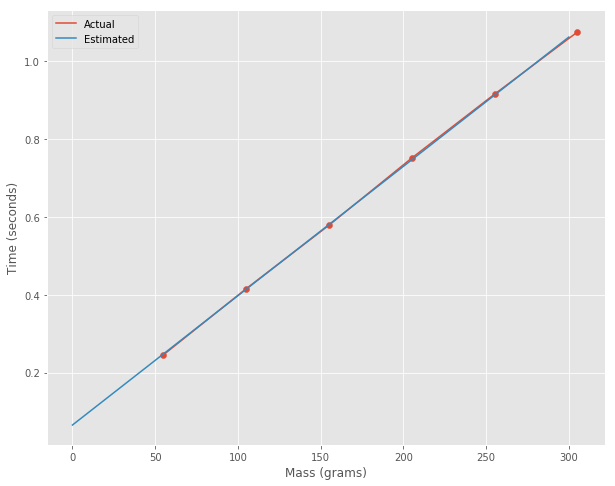

In [11]:
#To visualize the estimated line, create an x-vs-y set using m and c
x = [x/10 for x in range (0, 3000)]
y = [m*xi + c for xi in x]

#Plot again to visualize how the estimated line fairs against the original data
orig, = plt.plot(df['M (g)'], df['Tsq'], label="Actual")
plt.scatter(df['M (g)'], df['Tsq'])
est, = plt.plot(x, y, label="Estimated")
plt.xlabel('Mass (grams)')
plt.ylabel('Time (seconds)')
plt.legend(handles=[orig, est])
plt.show()
#plt.clf()

In [12]:
#Finding the error
error = 0.0
for index, row in df.iterrows():
    error += ((m*row['M (g)'] + c) - row['Tsq'])**2 #(Estimated - original)^2
error/=n

print("The mean squared error is:\t\t", error)
print("The root means squared error is:\t", error**(0.5))

The mean squared error is:		 9.277478047619415e-06
The root means squared error is:	 0.0030458952785050596
